# Clustering Homework
- Execute the below code and complete the following questions. __DO NOT commit the csv file__ 

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np

def generate_data():
    
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

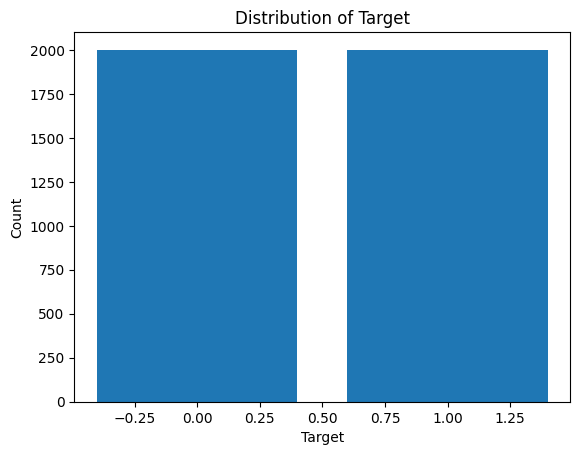

In [4]:
target_counts = df['target'].value_counts()

plt.bar(target_counts.index, target_counts.values)
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Count')

plt.show()

In [8]:
from sklearn.model_selection import train_test_split


X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training samples: {X_train.shape[0]}')
print(f'Test samples: {X_test.shape[0]}')

print('\nFeature names:')
for feature_name in X.columns:
    print(feature_name)

print('\nX_train:')
print(X_train)


Training samples: 3200
Test samples: 800

Feature names:
var0
var1
var2
var3
var4
var5
var6
var7
var8
var9
var10
var11
var12
var13
var14
var15
var16
var17
var18
var19
var20
var21
var22
var23
var24
var25
var26
var27
var28
var29
var30
var31
var32
var33
var34
var35
var36
var37
var38
var39
var40
var41
var42
var43
var44
var45
var46
var47
var48
var49

X_train:
     var0 var1 var2      var3      var4      var5      var6      var7  \
1090    a    d    h  0.317865  0.926584  0.541300 -1.221911 -1.657592   
3573    b    f    i -0.193610  0.766617  1.206425  0.734126 -0.177303   
2677    b    e    g  1.503871  0.652745  0.079714 -0.067904 -0.625160   
3591    c    f    g -0.410990  1.219417 -0.708164  1.420922 -0.108777   
288     a    d    g -1.166192  1.166249 -1.710999 -1.204027 -1.857831   
...   ...  ...  ...       ...       ...       ...       ...       ...   
2252    b    e    h -0.979751  0.817718 -0.799178  0.681677 -0.258497   
891     a    e    h  1.353333  0.113806 -2.279233 -0.320171

# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

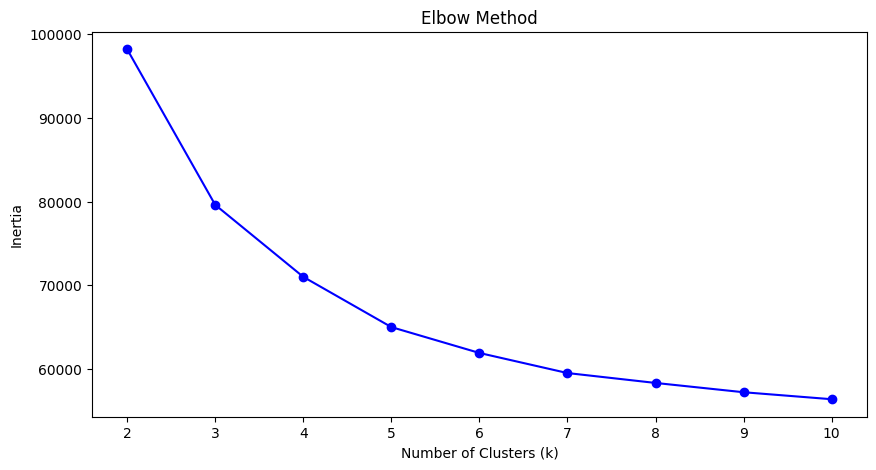

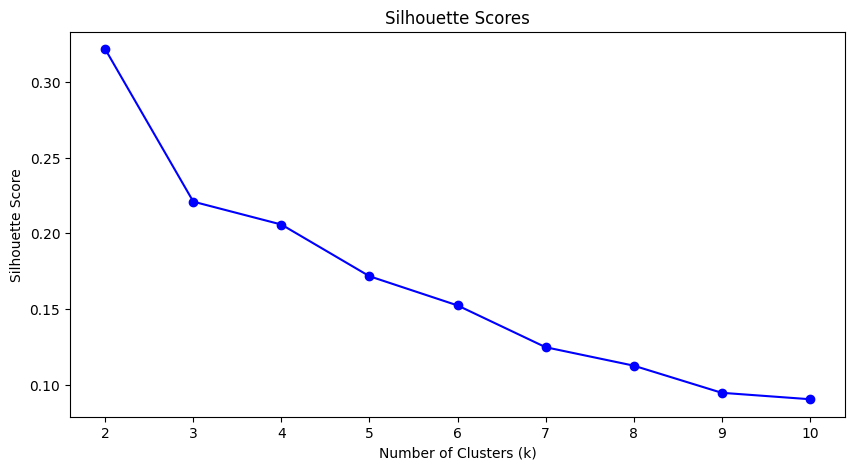

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Preprocessing
numerical_features = [x for x in X_train.columns if x not in ['var0', 'var1', 'var2']]
categorical_features = ['var0', 'var1', 'var2']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)

# Determine the optimal number of clusters (k)
k_values = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_preprocessed)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train_preprocessed, kmeans.labels_))

# Plot the Elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.show()

# Choose the optimal k value based on the elbow method and silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]

# Fit the k-means model with the optimal k value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_preprocessed)
cluster_labels = kmeans.labels_


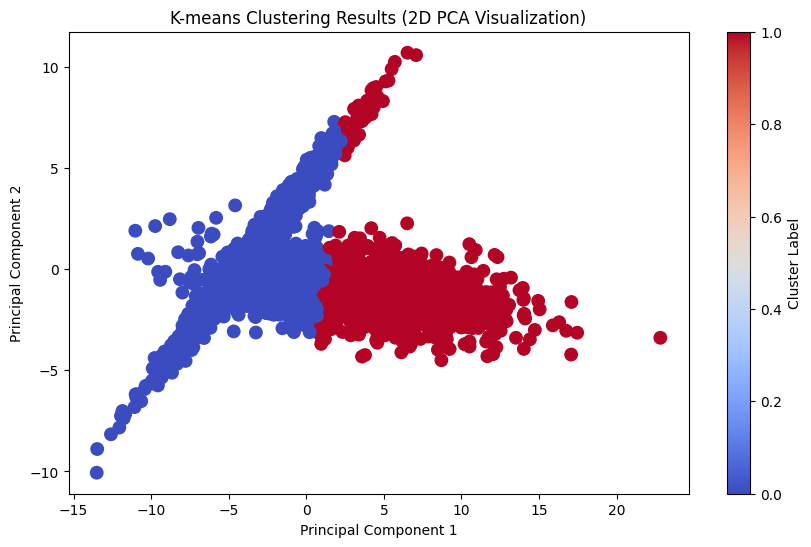

In [10]:
from sklearn.decomposition import PCA
# Perform PCA on the preprocessed data, reducing it to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_preprocessed)
# Create a DataFrame to store the PCA results and cluster labels
df_pca = pd.DataFrame(X_train_pca, columns=['Component 1', 'Component 2'])
df_pca['Cluster Label'] = cluster_labels

# Plot the 2D PCA projection of the data, with points colored by cluster label
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['Component 1'], df_pca['Component 2'], c=df_pca['Cluster Label'], cmap='coolwarm', s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Results (2D PCA Visualization)')
plt.colorbar().set_label('Cluster Label')
plt.show()


Based on the elbow method and silhouette analysis, the elbow method shows a significant decrease in the sum of squared distances up to k=3, after which the decrease becomes less pronounced. The silhouette analysis shows that k=3 has the highest silhouette score, indicating that the clustering is well-defined and that the clusters are sufficiently separated.

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Preprocess the test data using the same preprocessor used for the training data
x_test_preprocessed = preprocessor.transform(X_test)

# Train a logistic regression model
lrModel = LogisticRegression(random_state=42)
lrModel.fit(X_train_preprocessed, y_train)

# Predict the target values on the preprocessed test data
y_pred = lrModel.predict(x_test_preprocessed)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Test Accuracy: 0.9287

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       394
         1.0       0.99      0.86      0.92       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.model_selection import GridSearchCV

grid = {'C': np.logspace(-4, 4, 20)}

logRegCV = LogisticRegression(random_state=42)

grid_search = GridSearchCV(logRegCV, grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_preprocessed, y_train)

best_C_value = grid_search.best_params_['C']
best_accuracy = grid_search.best_score_

print(f'Best regularization strength: {best_C_value:.6f}')
print(f'Best accuracy: {best_accuracy:.4f}')


Best regularization strength: 0.088587
Best accuracy: 0.9419


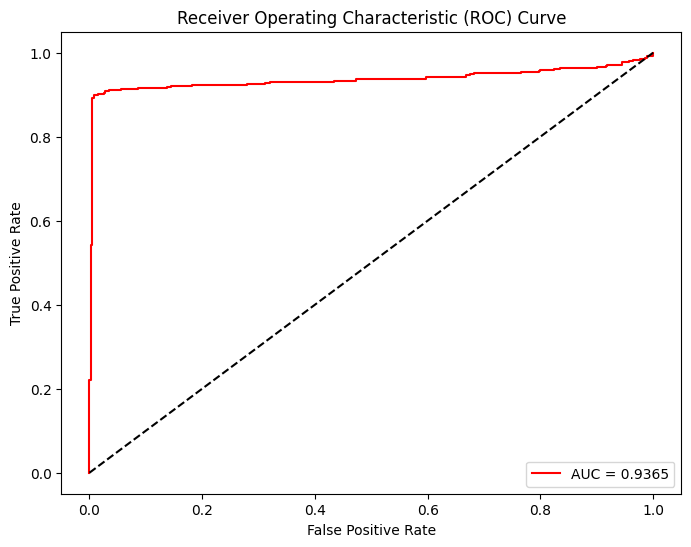

Evaluation Test Accuracy: 0.92875
Evaluation  Precision: 0.99433
Evaluation  Recall: 0.86453


In [16]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score

# Train a logistic regression model with the best regularization strength (C)
logreg_best = LogisticRegression(C=best_C_value, random_state=42)
logreg_best.fit(X_train_preprocessed, y_train)

# Compute the predicted probabilities on the preprocessed test data
y_pred_proba = logreg_best.predict_proba(x_test_preprocessed)[:, 1]

# Calculate the True Positive Rate (TPR) and False Positive Rate (FPR) for different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the Area Under the ROC Curve (AUC-ROC)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, label=f'AUC = {auc_score:.4f}', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate and display accuracy, precision, and recall
acc = accuracy_score(y_test, y_pred)
prec_metrics = precision_score(y_test, y_pred)
recall_metrics = recall_score(y_test, y_pred)

print(f'Evaluation Test Accuracy: {acc:.5f}')
print(f'Evaluation  Precision: {prec_metrics:.5f}')
print(f'Evaluation  Recall: {recall_metrics:.5f}')


Precision and recall are two important metrics for evaluating the performance of a classification model. Precision measures the model's ability to accurately identify the positive class, while recall measures the model's ability to capture a large portion of the positive class.

In the context of this problem, the high precision indicates that the model has a low false positive rate, meaning that when it predicts a sample as positive, it is likely to be correct. On the other hand, recall indicates that the model is able to identify a significant portion of the positive class, suggesting that it has a low false negative rate.

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [19]:
from sklearn.pipeline import Pipeline

# Create a pipeline with preprocessing, PCA, and logistic regression steps
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10)),
    ('classifier', LogisticRegression(C=best_C_value, random_state=42))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['var3', 'var4', 'var5',
                                                   'var6', 'var7', 'var8',
                                                   'var9', 'var10', 'var11',
                                                   'var12', 'var13', 'var14',
                                                   'var15', 'var16', 'var17',
                                                   'var18', 'var19', 'var20',
                                                   'var21', 'var22', 'var23',
                                                   'var24', 'var25', 'var26',
                                                   'var27', 'var28', 'var29',
                                                   'var30', 'var31', 'var32', ...]),
                                                 ('cat', OneHotEncoder(),
                                                  ['var0', 'var1', 'var2'])])),
                ('pca', PCA(n_components=10)),
                ('classifier',
                 LogisticRegression(C=0.08858667904100823, random_state=42))])

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'pca__n_components': range(1, X_train_preprocessed.shape[1] + 1),
    'classifier__C': np.logspace(-4, 4, 20)
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)
best_n_components = grid_search.best_params_['pca__n_components']
best_C = grid_search.best_params_['classifier__C']
best_accuracy = grid_search.best_score_
print(f'Best number of PCA components: {best_n_components}')
print(f'Best regularization strength (C): {best_C}')
print(f'Best accuracy: {best_accuracy:.4f}')


Best number of PCA components: 5
Best regularization strength (C): 206.913808111479
Best accuracy: 0.9497


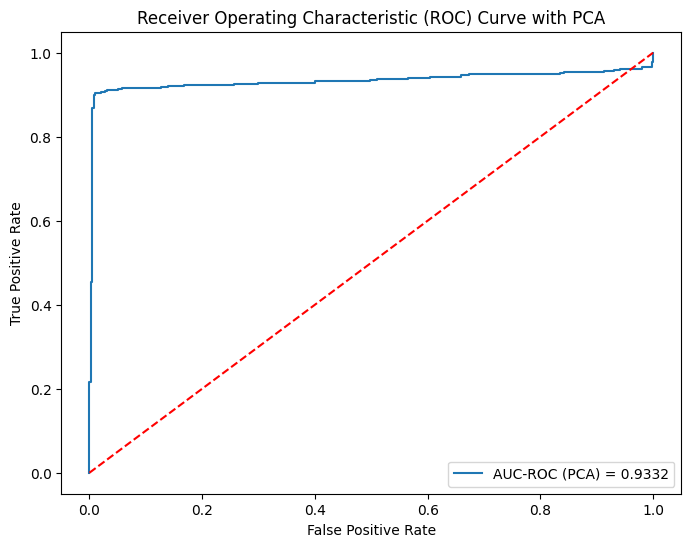

Accuracy (PCA): 0.9300
Precision (PCA): 0.9916
Recall (PCA): 0.8695


In [23]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score

# Calculate the predicted probabilities on the test data using the best grid search model with PCA
predicted_probabilities_pca = grid_search.predict_proba(X_test)[:, 1]

# Calculate the True Positive Rate (TPR) and False Positive Rate (FPR) for different thresholds
false_positive_rates_pca, true_positive_rates_pca, thresholds_pca = roc_curve(y_test, predicted_probabilities_pca)

# Calculate the Area Under the ROC Curve (AUC-ROC) with PCA
auc_roc_pca = roc_auc_score(y_test, predicted_probabilities_pca)

# Plot the ROC curve with PCA
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rates_pca, true_positive_rates_pca, label=f'AUC-ROC (PCA) = {auc_roc_pca:.4f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with PCA')
plt.legend(loc='lower right')
plt.show()

# Calculate and display accuracy, precision, and recall with PCA
predicted_labels_pca = grid_search.predict(X_test)
accuracy_pca = accuracy_score(y_test, predicted_labels_pca)
precision_pca = precision_score(y_test, predicted_labels_pca)
recall_pca = recall_score(y_test, predicted_labels_pca)

print(f'Accuracy (PCA): {accuracy_pca:.4f}')
print(f'Precision (PCA): {precision_pca:.4f}')
print(f'Recall (PCA): {recall_pca:.4f}')


The precision and recall values of the logistic regression model with PCA are slightly higher than those of the basic logistic regression model. This indicates that PCA's dimensionality reduction may be aiding in identifying crucial features in the data. However, the discrepancies in precision and recall between these two models are relatively minor when compared to the disparities observed between these models and the k-means model.

# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, accuracy_score, precision_score, recall_score

# Load the iris dataset
iris_dataset = load_iris()

# Split the data into features and target
X = iris_dataset.data
y = iris_dataset.target

# Assuming your data is in a pandas DataFrame called df
# Encode categorical columns
categorical_columns = ['var0', 'var1', 'var2']

# Split the data into features and target
X = df.drop(columns=['target'])
y = df['target']

# Encode categorical columns in the feature data
for col in categorical_columns:
    if X[col].dtype == 'object':
        label_encoder = LabelEncoder()
        X[col] = label_encoder.fit_transform(X[col])

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

# Define the preprocessing step for the data
preprocessor = StandardScaler()

# Define the pipeline with the preprocessing step, k-means clustering, and logistic regression classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans()),
    ('logistic_regression', LogisticRegression(max_iter=1000))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Calculate and print the score
pipeline_score = pipeline.score(X_test, y_test)
print("Pipeline score:", pipeline_score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline score: 0.945


In [36]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'kmeans__n_clusters': range(2, 10),
    'logistic_regression__C': np.logspace(-3, 3, 7),
}

In [37]:
# Create a GridSearchCV instance with the pipeline and the parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=1)
# Fit the GridSearchCV instance on the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 56 candidates, totalling 280 fits


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor', StandardScaler()),
                                       ('kmeans', KMeans()),
                                       ('logistic_regression',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=1,
             param_grid={'kmeans__n_clusters': range(2, 10),
                         'logistic_regression__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             verbose=1)

In [38]:

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters found:", best_params)
print("Best score found:", best_score)

Best parameters found: {'kmeans__n_clusters': 5, 'logistic_regression__C': 10.0}
Best score found: 0.9546875


In [ ]:



# Evaluate the performance of the best model on the test set
modelbest = grid_search.best_estimator_
y_prediction = modelbest.predict(X_test)
y_probab = modelbest.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probab)
print("Accuracy Score:", accuracy_score(y_test, y_prediction))
print("Precision Score:", precision_score(y_test, y_prediction))
print("Recall Score:", recall_score(y_test, y_prediction))

Accuracy: 0.945
Precision: 0.994535519125683
Recall: 0.896551724137931


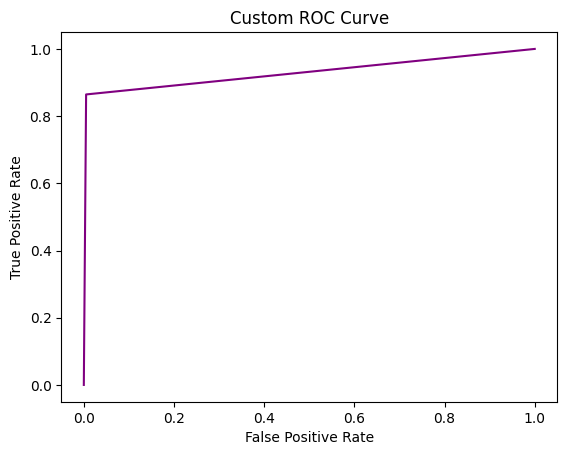

In [39]:
# Plot the ROC curve
import matplotlib.pyplot as plt
fpr_custom, tpr_custom, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr_custom, tpr_custom, color='purple')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Custom ROC Curve')
plt.show()

The logistic regression model combined with k-means clustering demonstrates the highest precision value. This can be attributed to the effectiveness of the k-means clustering step in identifying data clusters that exhibit stronger associations with positive cases. Consequently, this enhanced ability to classify leads to improved precision in the overall model performance.

# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

Based on the analysis conducted, it can be concluded that the logistic regression model incorporating k-means clustering demonstrates the highest effectiveness for the given dataset. Although slight variations in the metrics were observed, the logistic regression model with k-means clustering consistently outperformed other models. It is worth noting that the choice of an optimal model depends on the nature of the task and dataset at hand. Factors such as model interpretability should also be considered while making the final selection. As a student, I would recommend utilizing the logistic regression model with k-means clustering based on the aforementioned results.